In [2]:

import pandas as pd
import numpy as np
import time
import csv
import logging
import os

In [3]:
logger_file = 'ACO_logger.txt'

logging.basicConfig(filename=logger_file, format='%(asctime)s %(message)s', filemode='w')
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [4]:
file_name  = 'straight_line_node_matrix.csv'
file = open(file_name, 'r')
csvfile = csv.reader(file)
distances_matrix = []
for row in csvfile:
    for index, element in enumerate(row):
        if element == 'None':
            pass
        else:
            row[index] = int(element)
        
    distances_matrix.append(row)
distances_matrix

[['None', 10, 15, 20],
 [10, 'None', 35, 25],
 [15, 35, 'None', 30],
 [20, 25, 30, 'None']]

In [5]:
nodes = np.arange(len(distances_matrix))
node_connections = {}
for node in nodes: 
    node_connections[node] = []
    for index, connection in enumerate(distances_matrix[node]):
        if connection != 'None': 
            node_connections[node].append(index)
            
node_connections

{0: [1, 2, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}

In [6]:
file_name = 'pheromon_matrix.csv'
file = open(file_name, 'r')
csvfile = csv.reader(file)
pheromone_matrix = []
for row in csvfile:
    for index, element in enumerate(row):
        if element == 'None':
            pass
        else:
            row[index] = float(element)
        
    pheromone_matrix.append(row)
pheromone_matrix 

[['None', 0.5, 0.5, 0.5],
 [0.5, 'None', 0.5, 0.5],
 [0.5, 0.5, 'None', 0.5],
 [0.5, 0.5, 0.5, 'None']]

optimal path is 0-1-3-2-0
length of this path is 80

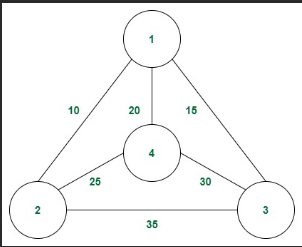

In [7]:
K = 1 # number of ants 
E = 0.9 # evapoartion rate
Q = 5 # pheromone laying rate 
A = 1 # pheremone weight
B = 1 # distance weight 

In [8]:

iterations = 0
shortest_length = 10000
best_path = []

def pick_node(node : int, visited_nodes_tracker : list) -> int: 
    
    p_dict = {}
    possible_nodes = [x for x in node_connections[node] if x not in visited_nodes_tracker]
    denominator =  sum([(pheromone_matrix[node][x]**A)*(distances_matrix[node][x]**B) for x in possible_nodes])
    for p_node in possible_nodes:
        pheromone = pheromone_matrix[node][p_node]
        distance = distances_matrix[node][p_node]

        p = ((pheromone**A)*(distance**B)) / denominator
        p_dict[p_node] = p 
            
    node_picker = np.random.random()
    sum_of_p = 0
    for node in p_dict.keys():
        sum_of_p += p_dict[node]
        if node_picker < sum_of_p:
            return node
        
def evapourate_pheromone() -> None:
    for row in pheromone_matrix:
        for node in nodes: 
            if row[node] != 'None':
                row[node] *= E

def lay_pheromone(ant) -> int:
    total_length = 0
    for edge in path_tracker[ant]: 
        total_length += distances_matrix[edge[0]][edge[1]]
    
    pheromone_update = Q/total_length
    
    for edge in path_tracker[ant]: 
        pheromone_matrix[edge[0]][edge[1]] += pheromone_update
        pheromone_matrix[edge[1]][edge[0]] += pheromone_update
            
    return total_length
        

while(shortest_length > 80) or (iterations > 1000):
    
    path_tracker = {}
    
    logger.debug(f'Iteration - {iterations}   -----------------------------------------------------------------   Iteration - {iterations}')
    logger.debug('Pheromone matrix:')
    for row in pheromone_matrix: 
        logger.debug(row)
    
    for ant in range(K):
        
        path_tracker[ant] = []
        starting_node = 0
        current_node = 0
        visited_nodes = [False]*len(nodes)
        visited_nodes_tracker = []
        visited_nodes[current_node] = True
        visited_nodes_tracker.append(current_node)
        while False in visited_nodes:
            
            #pick new node
            #pick new node
            next_node = pick_node(current_node, visited_nodes_tracker)
            try: 
                assert(type(next_node) == int)
            except: 
                print(current_node, next_node)
        
            #move if possible 
            path_tracker[ant].append((current_node, next_node))
            #update current node 

            current_node = next_node
            
            visited_nodes[current_node] = True
            visited_nodes_tracker.append(current_node)

        if current_node != starting_node:
            path_tracker[ant].append((current_node, starting_node))
            
        logger.debug(f'Ant {ant} found route - {path_tracker[ant]}')
    
    #evapourate pheromone   
    evapourate_pheromone()

    
    #update all pheronome and reset path tracker 
    for ant in range(K):
        length_of_route = lay_pheromone(ant)
        if length_of_route < shortest_length:
            best_path = path_tracker[ant]
            shortest_length = length_of_route
    logger.debug(f'BEST PATH : {best_path}')
    logger.debug(f'LENGTH : {shortest_length}')
        
    iterations += 1
            
print(iterations)    
print(best_path)
print(shortest_length)
    


6
[(0, 1), (1, 3), (3, 2), (2, 0)]
80
